#  Gaussian Mixture Models (GMM) tutorial
Followed from: [link](https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php)

- GMM algorithm is an unsupervised clustering algorithm.
- It's constituents are Gaussian distributions.
- The algorithm tries to fit a mixture of Gaussians to the training set.
- While SGD could be used to build a GMM, Expectation Maximization (EM) offers better performance at the same task.
- The EM algorithm has two main parts:
    1. E-Step: for calculating the densities of the datapoints.
    2. M-Step: for updating or estimating the parameters of the GMM.

## Initial Step
1. Decide how many sources or clusters (c) in the dataset.
2. Initialize the parameters mean $\mu_c$, covariance $\Sigma_c$, and a cluster weights $\pi_c$, subject to $\sum_c\pi_c=1$

##  E - Step
Calculate for each datapoint $x_i$ the probability $r_{ic}$ that datapoint $x_i$ belongs to cluster c with:
\begin{equation}
r_{ic}= \frac{\pi_cN\left(x_i\mid\mu_c,\Sigma_c\right)}{\Sigma_{k=1}^K\pi_kN\left(x_i\mid\mu_k,\Sigma_k\right)}
\end{equation}
where $N\left(x\mid\mu,\sum\right)$ describes the multivariate Gaussian with:
\begin{equation}
N\left(x\mid\mu,\Sigma\right)=\frac{1}{(2\pi)^{\frac{n}{2}}\mid\Sigma_c\mid^{\frac{1}{2}}}exp\left(-\frac{1}{2}\left(x_i-\mu_c\right)^T\Sigma^{-1}_c\left(x_i-\mu_c\right)\right)
\end{equation}

MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

##  M - Step
For each cluster $c$:
1. Calculate the total weight $m_c$, the fraction of points allocated to cluster $c$ and update the GMM parameters with $r_{ic}$:
\begin{align}
m_c &= \sum_ir_{ic}\\
\pi &= \frac{m_c}{m}\\
\mu_c &= \frac{1}{m_c}\sum_ir_{ic}x_i\\
\Sigma_c&=\frac{1}{m_c}\sum_ir_{ic}(x_i-\mu_c)^T(x_i-\mu_c)
\end{align}

**The updated means are used in the last formula**. Repeat E and M steps till convergence.
### Likelihood computation / loss function
Log likelihood:
\begin{equation}
ln~p(X\mid\pi,\mu,\Sigma)=\sum_{i=1}^Nln\left(\sum^K_{k=1}\pi_kN\left(x_i\mid\mu_k,\Sigma_k\right)\right)
\end{equation}

##  Implementation with sklearn

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [3]:
style.use('seaborn')

###  Create dataset

In [4]:
X, Y = make_blobs(cluster_std=0.5, random_state=20, n_samples=1000, centers=5)

###  Stretch dataset to get ellipsoid data

In [5]:
X = np.dot(X, np.random.RandomState(0).randn(2,2))
x, y = np.meshgrid(np.sort(X[:, 0]), np.sort(X[:, 1]))

In [6]:
XY = np.array([x.flatten(), y.flatten()]).T

In [35]:
GMM = GaussianMixture(n_components=5).fit(X) # instantiate and fit the model
print('Converged:', GMM.converged_) # check if the model has converged

Converged: True


In [36]:
means = GMM.means_

In [37]:
means

array([[ -0.49282149, -12.37705278],
       [ 10.94510475,  18.59634417],
       [-12.56857912,   4.85978424],
       [ -3.92027834,  -0.16528677],
       [ 19.85757916,  17.34078884]])

In [38]:
covariances = GMM.covariances_

In [39]:
print(str(covariances))

[[[1.02906033 0.8413495 ]
  [0.8413495  1.5081849 ]]

 [[0.96755872 0.79622775]
  [0.79622775 1.43355228]]

 [[0.94633179 0.69274809]
  [0.69274809 1.38106594]]

 [[0.95004033 0.72007886]
  [0.72007886 1.37181252]]

 [[0.86698786 0.56596329]
  [0.56596329 1.09824226]]]


In [40]:
# predict
Y = np.array([[0.5],[0.5]])
prediction = GMM.predict_proba(Y.T)
print(prediction)

[[4.00098007e-33 5.02664415e-44 9.36305075e-82 1.00000000e+00
  1.94756664e-93]]


### Plot

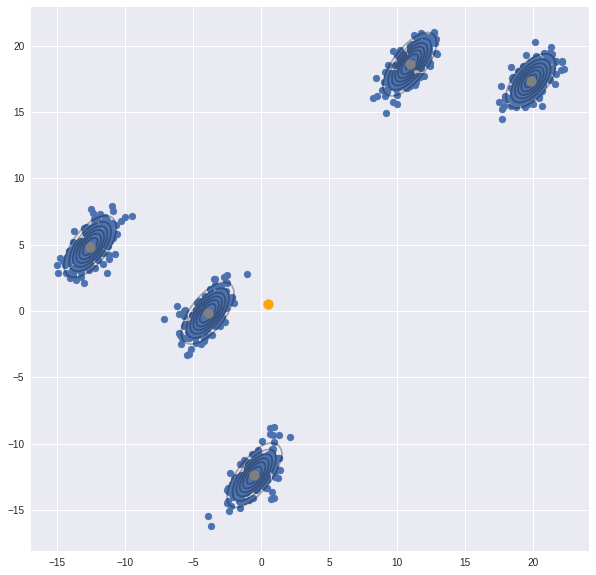

In [41]:
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0],X[:,1])
ax0.scatter(Y[0,:],Y[1,:],c='orange',zorder=10,s=100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.show()

In [20]:
XY.shape

(1000000, 2)